<a href="https://colab.research.google.com/github/Itskindastrange/Rock-Paper-Scissors/blob/main/RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2024-06-28 20:22:11--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 108.177.12.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  89.9MB/s    in 2.1s    

2024-06-28 20:22:14 (89.9 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2024-06-28 20:22:14--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 108.177.12.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-071.png', 'rock03-019.png', 'rock01-002.png', 'rock03-115.png', 'rock05ck01-113.png', 'rock01-052.png', 'rock04-108.png', 'rock04-038.png', 'rock07-k03-093.png', 'rock07-k03-054.png']
['paper02-073.png', 'paper04-038.png', 'paper02-118.png', 'paper03-004.png', 'paper01-095.png', 'paper01-002.png', 'paper06-034.png', 'paper03-073.png', 'paper01-094.png', 'paper04-115.png']
['testscissors03-103.png', 'scissors01-095.png', 'scissors04-017.png', 'scissors03-072.png', 'scissors03-017.png', 'testscissors03-035.png', 'scissors02-044.png', 'testscissors02-033.png', 'scissors03-011.png', 'scissors03-003.png']


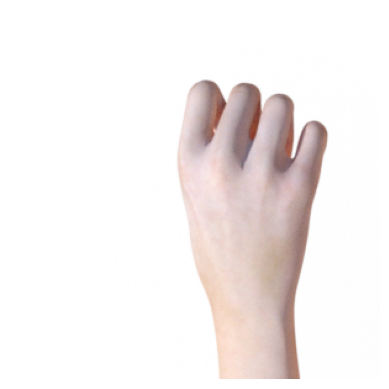

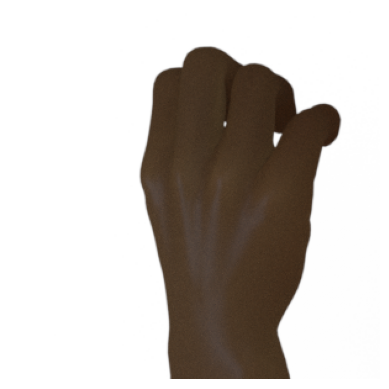

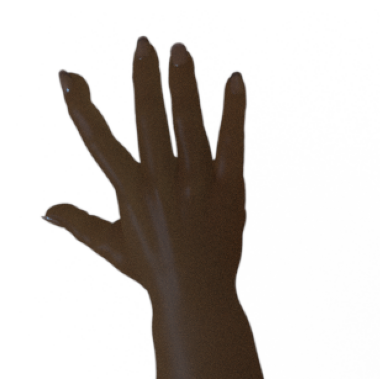

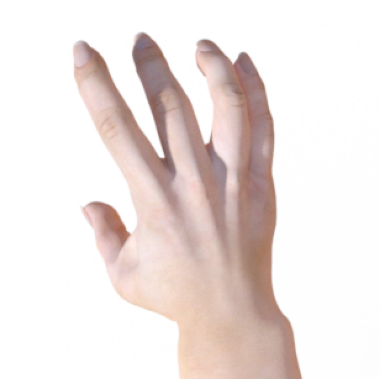

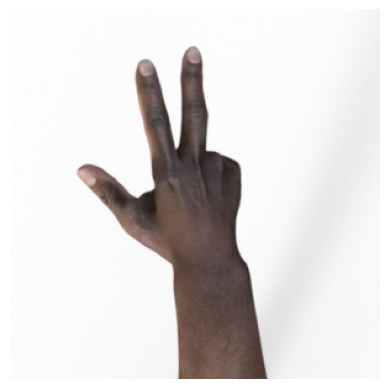

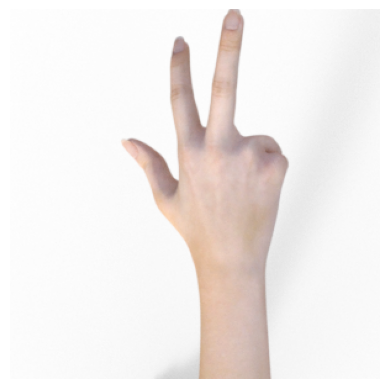

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [7]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [8]:

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 120ms/step
[[0.00215651 0.01016917 0.9876743 ]]


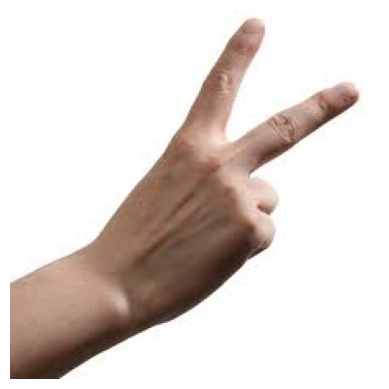

Predicted class: scissors


In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the model
model = load_model("rps.h5")

# Function to prepare the image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
    img_array /= 255.0  # Normalize the image
    return img_array

# Path to the image you want to predict
img_path = "/content/scissors.jpeg"

# Prepare the image
img_array = prepare_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
print(prediction)

#print the input pic
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

# Interpret the prediction
class_names = ['rock', 'paper', 'scissors']
predicted_class = class_names[np.argmax(prediction)]
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 143ms/step
[[7.458933e-08 9.999999e-01 3.727102e-09]]


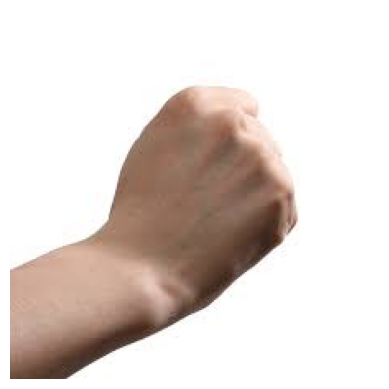

Predicted class: paper


In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the model
model = load_model("rps.h5")

# Function to prepare the image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
    img_array /= 255.0  # Normalize the image
    return img_array

# Path to the image you want to predict
img_path = "/content/rock.jpeg"

# Prepare the image
img_array = prepare_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
print(prediction)

#print the input pic
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

# Interpret the prediction
class_names = ['rock', 'paper', 'scissors']
predicted_class = class_names[np.argmax(prediction)]
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 225ms/step
[[0.94173956 0.00233888 0.05592158]]


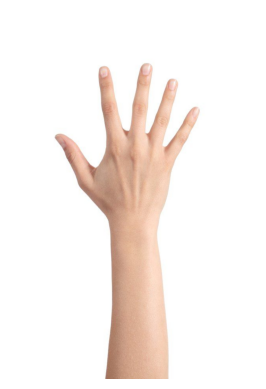

Predicted class: rock


In [14]:
import numpy as np
from tensorflow.keras.models import load_model
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the model
model = load_model("rps.h5")

# Function to prepare the image
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
    img_array /= 255.0  # Normalize the image
    return img_array

# Path to the image you want to predict
img_path = "/content/paper.jpeg"

# Prepare the image
img_array = prepare_image(img_path)

# Make a prediction
prediction = model.predict(img_array)
print(prediction)

#print the input pic
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('Off')
plt.show()

# Interpret the prediction
class_names = ['rock', 'paper', 'scissors']
predicted_class = class_names[np.argmax(prediction)]
print("Predicted class:", predicted_class)
